In [64]:
# import libraries (ok sous base anaconda)
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os
import xarray as xr
import numpy as np
import pandas as pd
import scipy
import math
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Degree of (un)certainty of the tiertile of the sequestration time, across the 11 versions of calculating it

In [65]:
# To be change with local directory of the data (file too heavy to be on git)
import os
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration')

In [66]:
# load the different files of the mean time seq
no_dep = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_no_dep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

T_dep = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_T_dep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })
O2_dep = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_O2_dep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

O2_T_dep = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_O2_T_dep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

high_Kremin = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_high_Kremin.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })
low_Kremin = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_low_Kremin.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

high_Wsink = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_high_Wsink.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })
low_Wsink = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_low_Wsink.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

high_KO2 = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_high_KO2.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })
low_KO2 = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_low_KO2.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

altern_Tdep = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_alternative_Tdep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

In [67]:
no_dep = no_dep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
T_dep = T_dep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
O2_dep = O2_dep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

O2_T_dep = O2_T_dep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

high_Kremin = high_Kremin.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
low_Kremin = low_Kremin.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

high_Wsink = high_Wsink.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
low_Wsink = low_Wsink.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

high_KO2 = high_KO2.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
low_KO2 = low_KO2.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

altern_Tdep = altern_Tdep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

#  Calculate the upper tiertile for each versions of the time of sequestration

In [68]:
no_dep_quantile  = no_dep['mean_seq_time'].quantile(q=[0.3333, 0.6666])
T_dep_quantile = T_dep['mean_seq_time'].quantile(q=[0.3333, 0.6666])
O2_dep_quantile = O2_dep['mean_seq_time'].quantile(q=[0.3333, 0.6666])
O2_T_dep_quantile = O2_T_dep['mean_seq_time'].quantile(q=[0.3333, 0.6666])
high_Kremin_quantile = high_Kremin['mean_seq_time'].quantile(q=[0.3333, 0.6666])
low_Kremin_quantile = low_Kremin['mean_seq_time'].quantile(q=[0.3333, 0.6666])
high_Wsink_quantile = high_Wsink['mean_seq_time'].quantile(q=[0.3333, 0.6666])
low_Wsink_quantile = low_Wsink['mean_seq_time'].quantile(q=[0.3333, 0.6666])
high_KO2_quantile = high_KO2['mean_seq_time'].quantile(q=[0.3333, 0.6666])
low_KO2_quantile = low_KO2['mean_seq_time'].quantile(q=[0.3333, 0.6666])
altern_Tdep_quantile = altern_Tdep['mean_seq_time'].quantile(q=[0.3333, 0.6666])

In [69]:
no_dep['Upper_tiertile_no_dep'] = [1 if x > no_dep_quantile.iloc[1] else 0 for x in no_dep['mean_seq_time']]
T_dep['Upper_tiertile_T_dep'] = [1 if x > T_dep_quantile.iloc[1] else 0 for x in T_dep['mean_seq_time']]
O2_dep['Upper_tiertile_O2_dep'] = [1 if x > O2_dep_quantile.iloc[1] else 0 for x in O2_dep['mean_seq_time']]
O2_T_dep['Upper_tiertile_O2_T_dep'] = [1 if x > O2_T_dep_quantile.iloc[1] else 0 for x in O2_T_dep['mean_seq_time']]
high_Kremin['Upper_tiertile_high_Kremin'] = [1 if x > high_Kremin_quantile.iloc[1] else 0 for x in high_Kremin['mean_seq_time']]
low_Kremin['Upper_tiertile_low_Kremin'] = [1 if x > low_Kremin_quantile.iloc[1] else 0 for x in low_Kremin['mean_seq_time']]
high_Wsink['Upper_tiertile_high_Wsink'] = [1 if x > high_Wsink_quantile.iloc[1] else 0 for x in high_Wsink['mean_seq_time']]
low_Wsink['Upper_tiertile_low_Wsink'] = [1 if x > low_Wsink_quantile.iloc[1] else 0 for x in low_Wsink['mean_seq_time']]
high_KO2['Upper_tiertile_high_KO2'] = [1 if x > high_KO2_quantile.iloc[1] else 0 for x in high_KO2['mean_seq_time']]
low_KO2['Upper_tiertile_low_KO2'] = [1 if x > low_KO2_quantile.iloc[1] else 0 for x in low_KO2['mean_seq_time']]
altern_Tdep['Upper_tiertile_altern_Tdep'] = [1 if x > altern_Tdep_quantile.iloc[1] else 0 for x in altern_Tdep['mean_seq_time']]

# Calculate the number of time each cell is in the upper tiertile

In [70]:
# merge dfs together
time_seq_all_versions = pd.concat([no_dep, T_dep, O2_dep, O2_T_dep, high_Kremin, low_Kremin, high_Wsink, low_Wsink, high_KO2, low_KO2, altern_Tdep], 
                                  axis=1).drop(['mean_seq_time'], axis=1)

# count ID in upper tiertile : sum the columns
time_seq_all_versions['sum'] = time_seq_all_versions.sum(axis=1)
time_seq_all_versions['UT_%_across_versions'] = (100* time_seq_all_versions['sum']) / 11
time_seq_all_versions

Upper_tiertile_no_dep  Upper_tiertile_T_dep  \
latitude longitude                                                
-75      -179                           1                     1   
         -177                           1                     1   
         -175                           1                     1   
         -173                           1                     1   
         -171                           1                     1   
...                                   ...                   ...   
-45       167                           0                     0   
          173                           0                     0   
          175                           0                     0   
          177                           0                     0   
          179                           0                     0   

                    Upper_tiertile_O2_dep  Upper_tiertile_O2_T_dep  \
latitude longitude                                                   
-75      -179                           1                        1   
         -177                           1                        1   
         -175                           1                        1   
         -173                           1                        1   
         -171                           1                        1   
...                                   ...                      ...   
-45       167                           0                        0   
          173                           0                        0   
          175                           0                        0   
          177                           0                        0   
          179                           0                        0   

                    Upper_tiertile_high_Kremin  Upper_tiertile_low_Kremin  \
latitude longitude                                                          
-75      -179                                1                          1   
         -177                                1                          1   
         -175                                1                          1   
         -173                                1                          1   
         -171                                1                          1   
...                                        ...                        ...   
-45       167                                0                          0   
          173                                0                          0   
          175                                0                          0   
          177                                0                          0   
          179                                0                          0   

                    Upper_tiertile_high_Wsink  Upper_tiertile_low_Wsink  \
latitude longitude                                                        
-75      -179                               1                         1   
         -177                               1                         1   
         -175                               1                         1   
         -173                               1                         1   
         -171                               1                         1   
...                                       ...                       ...   
-45       167                               0                         0   
          173                               0                         0   
          175                               0                         0   
          177                               0                         0   
          179                               0                         0   

                    Upper_tiertile_high_KO2  Upper_tiertile_low_KO2  \
latitude longitude                                                    
-75      -179                             1                       1   
         -177                             1   

In [71]:
# Define color sequence
colors =["#d0f0fd", "#d6c06b" , "#f38912"] 
cmap = LinearSegmentedColormap.from_list("blue_purple_red", colors)

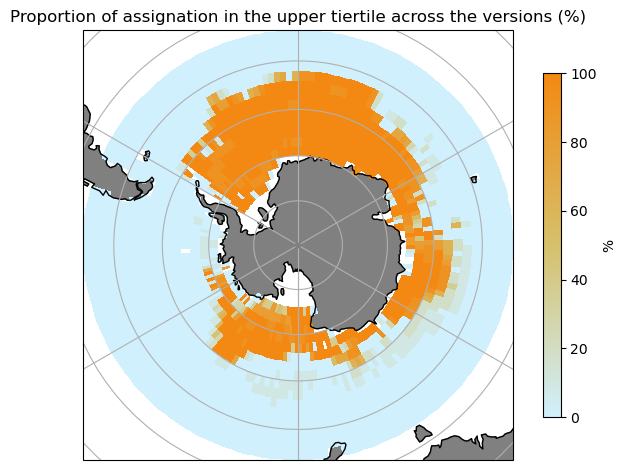

In [75]:
time_seq_all_versions_xarray = xr.Dataset.from_dataframe(time_seq_all_versions[['UT_%_across_versions']])
time_seq_all_versions_xarray

map_proj = ccrs.SouthPolarStereo()

p = time_seq_all_versions_xarray["UT_%_across_versions"].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    cmap= cmap
    # levels=[0, 1, 2, 3, 4, 5], 
    # colors = ['blanchedalmond', 'green', 'yellowgreen', 'red', 'mediumvioletred']
) 

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, label = '%', shrink = 0.8)
plt.title('Proportion of assignation in the upper tiertile across the versions (%)')

plt.tight_layout()
# plt.savefig('./figures/proportion_UT_timeseq_across_versions.png', bbox_inches = 'tight', dpi=300)

# Extract the version that is used in the main text

The version from the main texte is the "O2_T_dep" version.

In [55]:
# extract version of the main
time_main_version = time_seq_all_versions[['Upper_tiertile_O2_T_dep', 'UT_%_across_versions']]

# keep only cells from the tiertile according to this version
time_main_version = time_main_version[time_main_version["Upper_tiertile_O2_T_dep"] != 0]

print(time_main_version['UT_%_across_versions'].mean(), time_main_version['UT_%_across_versions'].min())
time_main_version

96.0205831903945 36.36363636363637


Upper_tiertile_O2_T_dep  UT_%_across_versions
latitude longitude                                               
-75      -179                             1            100.000000
         -177                             1            100.000000
         -175                             1            100.000000
         -173                             1            100.000000
         -171                             1            100.000000
...                                     ...                   ...
-53       19                              1            100.000000
          21                              1            100.000000
          23                              1            100.000000
          25                              1            100.000000
          27                              1             90.909091

[795 rows x 2 columns]

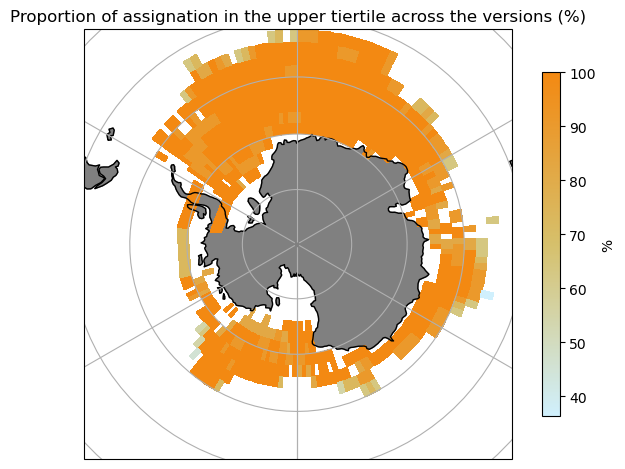

In [77]:
time_main_version_xarray = xr.Dataset.from_dataframe(time_main_version[['UT_%_across_versions']])
time_main_version_xarray = time_main_version_xarray.sortby(["latitude", "longitude"])

map_proj = ccrs.SouthPolarStereo()

p = time_main_version_xarray["UT_%_across_versions"].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    cmap= cmap
    # levels=[0, 1, 2, 3, 4, 5], 
    # colors = ['blanchedalmond', 'green', 'yellowgreen', 'red', 'mediumvioletred']
) 

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, label = '%', shrink = 0.8)
plt.title('Proportion of assignation in the upper tiertile across the versions (%)')

plt.tight_layout()
# plt.savefig('./figures/proportion_UT_timeseq_across_versions_main_version.png', bbox_inches = 'tight', dpi=300)